In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE

import matplotlib

from sklearn.metrics import rand_score

from tensorflow.keras.datasets import fashion_mnist

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [7]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [8]:
X_train_flat = X_train.reshape(60000,-1)
X_test_flat = X_test.reshape(10000, -1)

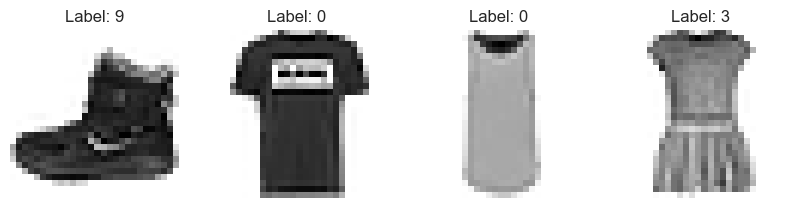

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, Y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

In [84]:
import pandas as pd

# Plotting function
matplotlib.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})
colors = ['purple', 'blue', 'green', 'yellow','purple', 'blue', 'green', 'yellow','purple', 'blue']

def plot_mnist(X, y, X_embedded, min_dist=10.0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)

    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    fig = plt.scatter(X_embedded[:, 0].reshape(-1,1), X_embedded[:, 1].reshape(-1,1), c=y.reshape(-1,1), cmap='Paired', marker='x')

    legend = ax.legend(*fig.legend_elements(),
                    loc="lower left", title="Classes")
    ax.add_artist(legend)  

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)

In [18]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train_flat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.010s...
[t-SNE] Computed neighbors for 60000 samples in 23.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

MINST Dataset - Two-dimensional embedding of 70 000 handwritten digits with t-SNE


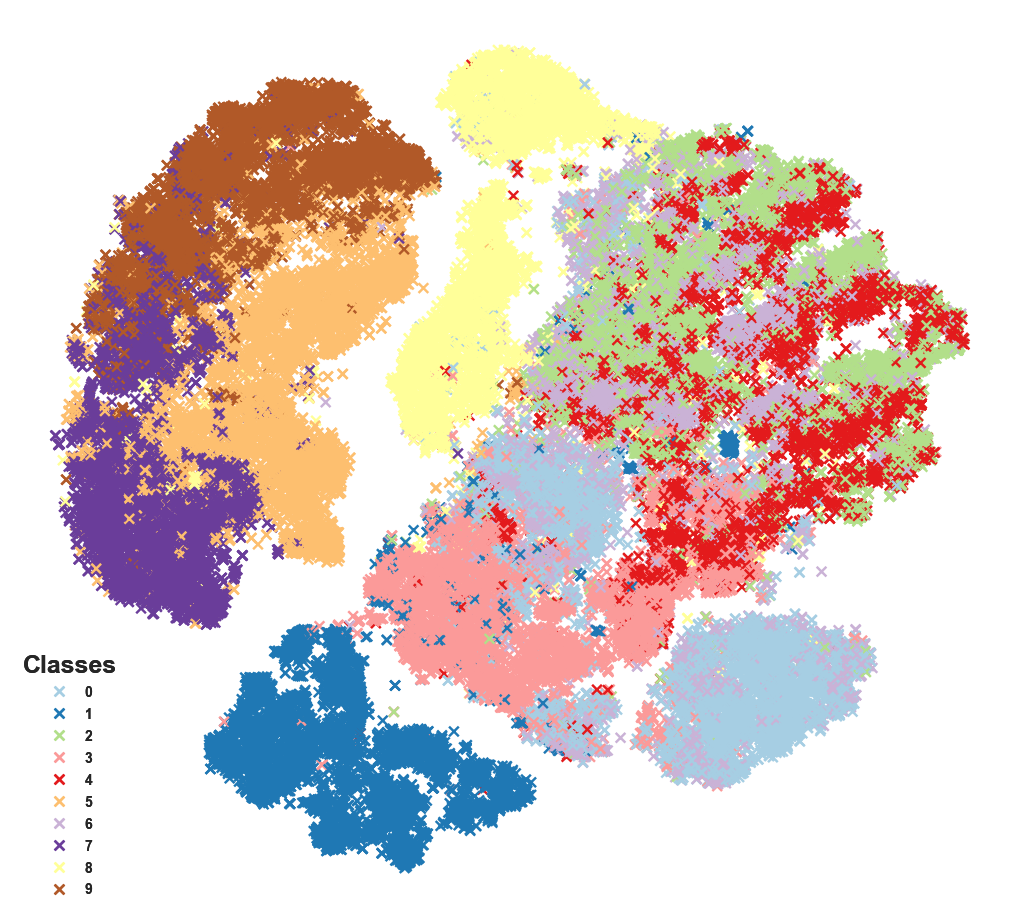

In [85]:
print("MINST Dataset - Two-dimensional embedding of 70 000 handwritten digits with t-SNE")
plot_mnist(X[indices[:n_train_samples]], Y_train, X_train_embedded,
           min_dist=None)

In [67]:
# class labels
class_names = ['T-shirt_top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [69]:
class_dict = dict(zip(range(10), class_names))

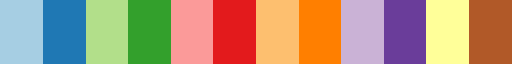

In [44]:
matplotlib.colormaps["Paired"]